In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns
import pyproj
import matplotlib as mpl

In [3]:
ts = xr.open_dataset('/Users/kyra/documents/Summer23/shout/mergedicethickness92.nc')
ts = ts.h
#ts = ts.x1 + ts.y1

slat = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat = slat.alatd
#print(slat)
#ts_arr = np.array(ts).reshape(196000000)

slon = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon = slon.alond
#print(slon)
#ts_arr = np.array(ts).reshape(196000000)

In [4]:
ts.time[1:3]

<xarray.DataArray 'time' (time: 2)>
array([100., 100.], dtype=float32)
Coordinates:
  * time     (time) float32 100.0 100.0
Attributes:
    standard_name:  time
    long_name:      time (-=BP, +=AP)
    units:          years
    calendar:       proleptic_gregorian
    axis:           T

In [5]:
(ts[2] - ts[1]).max()

<xarray.DataArray 'h' ()>
array(19.36248779)
Coordinates:
    time     float32 100.0

In [6]:
ts

<xarray.DataArray 'h' (time: 2500, y1: 280, x1: 280)>
[196000000 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.0 100.0 100.0 ... 1.249e+05 1.249e+05 1.25e+05
  * x1       (x1) float32 -2.79e+03 -2.77e+03 -2.75e+03 ... 2.77e+03 2.79e+03
  * y1       (y1) float32 -2.79e+03 -2.77e+03 -2.75e+03 ... 2.77e+03 2.79e+03
Attributes:
    long_name:       ice thickness
    units:           m
    FORTRAN_format:  e13.5

In [7]:
tsnew = ts[::2]
tsnew

<xarray.DataArray 'h' (time: 1250, y1: 280, x1: 280)>
[98000000 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.0 100.0 200.0 ... 1.247e+05 1.248e+05 1.249e+05
  * x1       (x1) float32 -2.79e+03 -2.77e+03 -2.75e+03 ... 2.77e+03 2.79e+03
  * y1       (y1) float32 -2.79e+03 -2.77e+03 -2.75e+03 ... 2.77e+03 2.79e+03
Attributes:
    long_name:       ice thickness
    units:           m
    FORTRAN_format:  e13.5

In [8]:
tsnew.to_netcdf('test.nc')

In [9]:
nts = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/h_new_data.nc')
nts = nts.h
#ts = ts.x1 + ts.y1
#print(ts)

n_slat = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/alatd_new_data.nc')
n_slat = n_slat.alatd
#print(slat)
#ts_arr = np.array(ts).reshape(196000000)

n_slon = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/alond_new_data.nc')
n_slon = n_slon.alond
#print(slon)
#ts_arr = np.array(ts).reshape(196000000)
ntsnew = nts[::2]

In [10]:
nts.to_netcdf('northnew.nc')

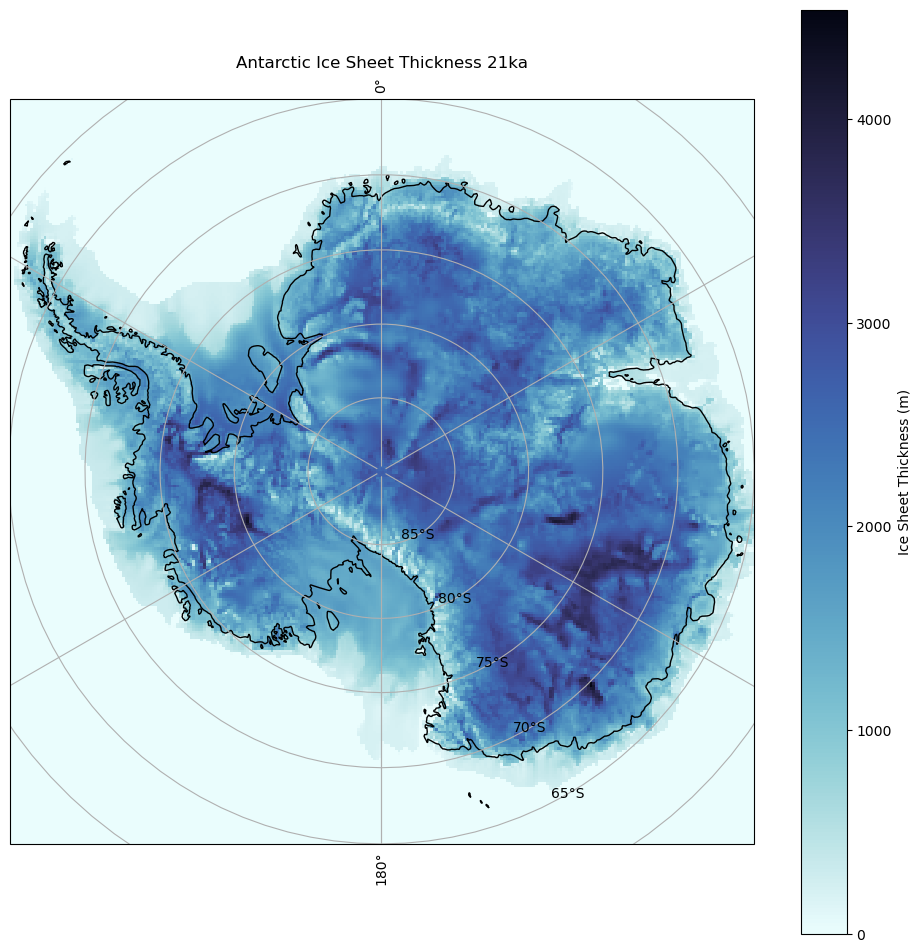

In [51]:
fig = plt.figure(figsize=(12, 12))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=ccrs.SouthPolarStereo())

ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)

x = slon.data
y = slat.data
c = ts.isel(time=2000).data

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = plt.get_cmap('cmo.ice_r')

im = ax.pcolormesh(x, y, c, cmap = cmap, transform=ccrs.PlateCarree())

cbar = fig.colorbar(im, location='right', pad=0.05, ax=ax)
cbar.set_label('Ice Sheet Thickness (m)')

ax.set_title("Antarctic Ice Sheet Thickness 21ka")

ax.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())

plt.show()

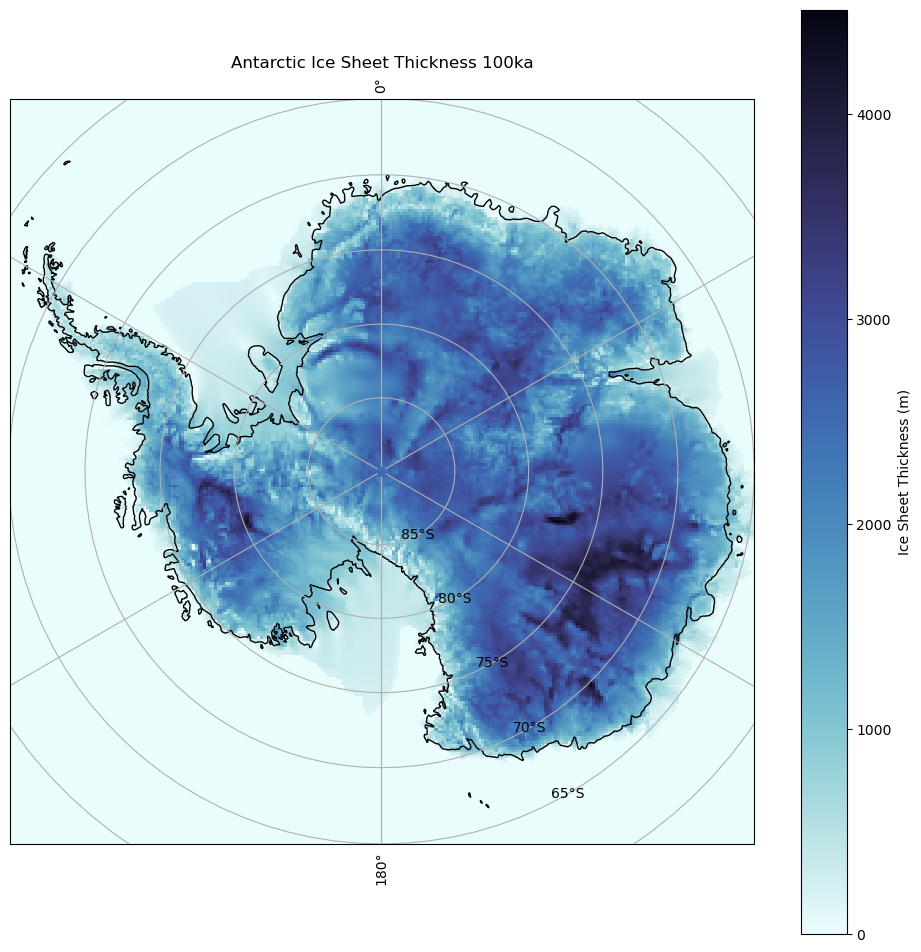

In [52]:
fig = plt.figure(figsize=(12, 12))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=ccrs.SouthPolarStereo())

ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)

x = slon.data
y = slat.data
c = ts.isel(time=42).data

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = plt.get_cmap('cmo.ice_r')

im = ax.pcolormesh(x, y, c, cmap = cmap, transform=ccrs.PlateCarree())

cbar = fig.colorbar(im, location='right', pad=0.05, ax=ax)
cbar.set_label('Ice Sheet Thickness (m)')

ax.set_title("Antarctic Ice Sheet Thickness 100ka")

ax.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())

plt.show()

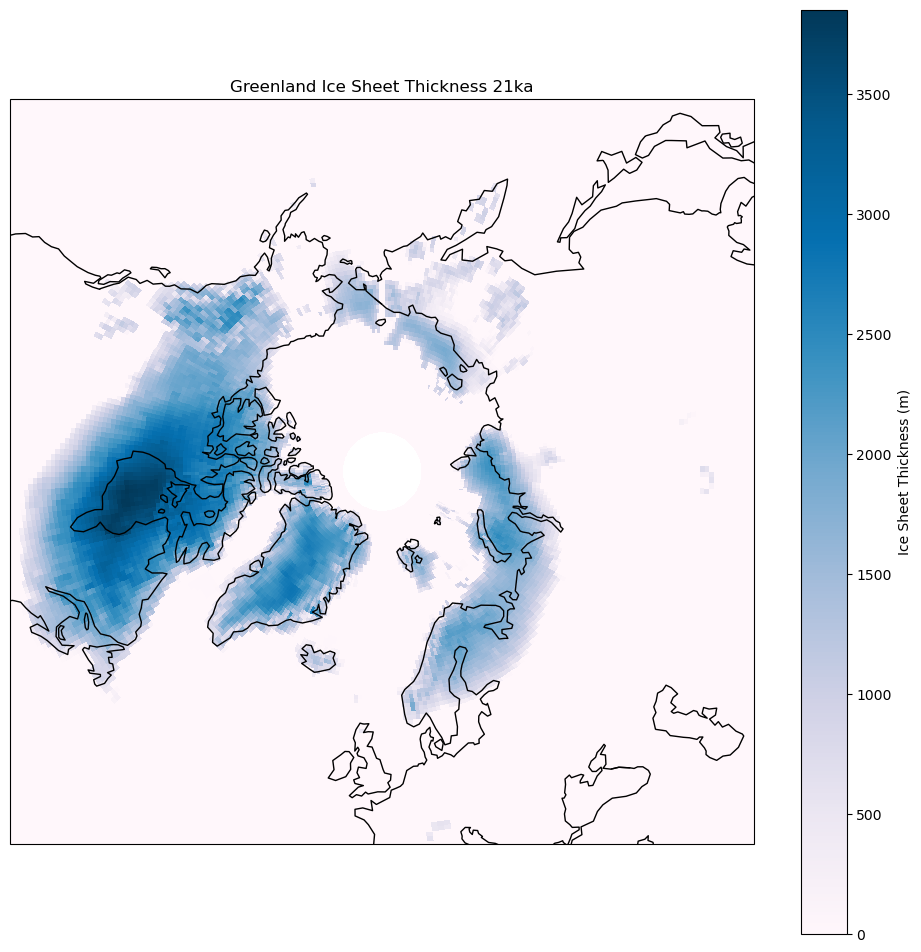

In [67]:
fig = plt.figure(figsize=(12, 12))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())

ax.set_global()
ax.coastlines()

x = n_slon.data
y = n_slat.data
c = nts.isel(time=2000).data

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = plt.get_cmap('PuBu')

im = ax.pcolormesh(x, y, c, cmap = cmap, transform=ccrs.PlateCarree())

cbar = fig.colorbar(im, location='right', pad=0.05, ax=ax)
cbar.set_label('Ice Sheet Thickness (m)')
ax.set_title("Greenland Ice Sheet Thickness 21ka")

ax.set_extent([-180, 180, 45, 90], ccrs.PlateCarree())

plt.show()

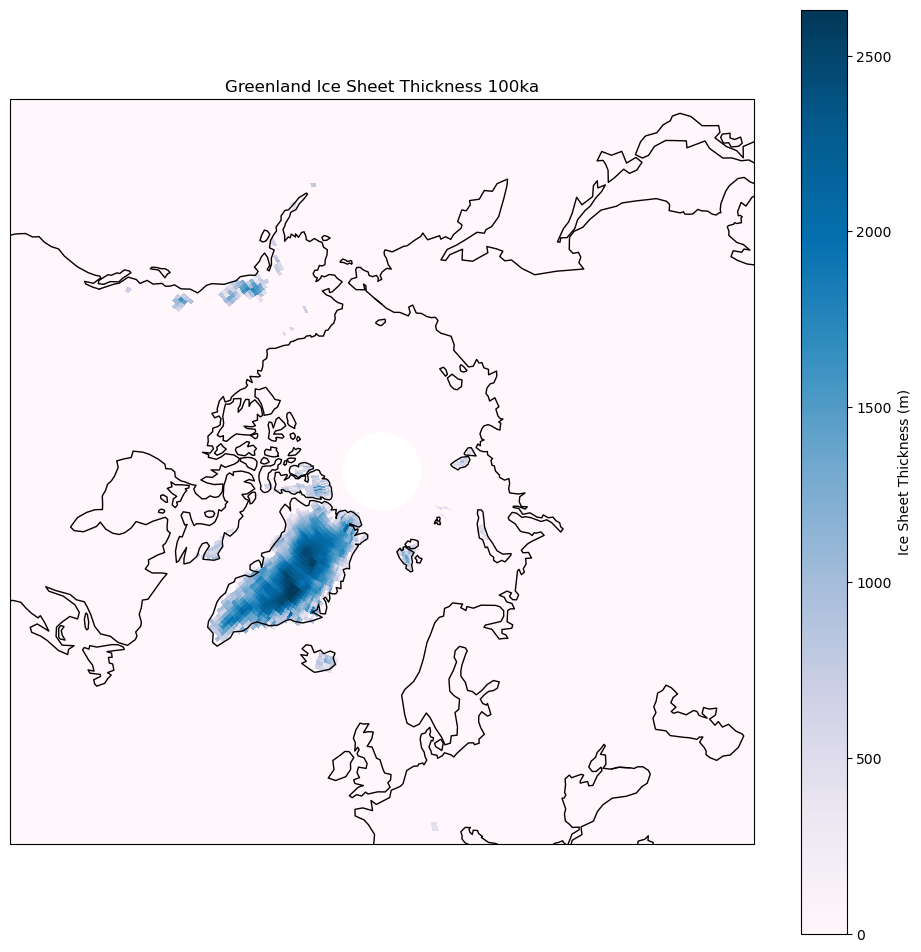

In [68]:
fig = plt.figure(figsize=(12, 12))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())

ax.set_global()
ax.coastlines()

x = n_slon.data
y = n_slat.data
c = nts.isel(time=42).data

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cmap = plt.get_cmap('PuBu')

im = ax.pcolormesh(x, y, c, cmap = cmap, transform=ccrs.PlateCarree())

cbar = fig.colorbar(im, location='right', pad=0.05, ax=ax)
cbar.set_label('Ice Sheet Thickness (m)')

ax.set_title("Greenland Ice Sheet Thickness 100ka")

ax.set_extent([-180, 180, 45, 90], ccrs.PlateCarree())

plt.show()

In [69]:
ts2 = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/h_new_data.nc')
ts2 = ts2.h
print(ts2)

<xarray.DataArray 'h' (time: 2500, y1: 130, x1: 360)>
[117000000 values with dtype=float32]
Coordinates:
  * time     (time) float32 100.0 200.0 100.0 ... 1.249e+05 1.249e+05 1.25e+05
  * x1       (x1) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * y1       (y1) float32 20.25 20.75 21.25 21.75 ... 83.25 83.75 84.25 84.75
Attributes:
    long_name:       ice thickness
    units:           m
    FORTRAN_format:  e13.5


In [306]:
# import cartopy.crs as ccrs

# p = ts.isel(time=2000).plot(
#     subplot_kws=dict(projection=ccrs.SouthPolarStereo()),
#     transform=ccrs.PlateCarree(),
# )

# p.axes.set_global()
# p.axes.coastlines()

In [308]:
# p = ts.isel(time = [0, 4]).plot(
#     transform=ccrs.PlateCarree(),
#     col="time",
#     subplot_kws={"projection": ccrs.SouthPolarStereo()},)

# for ax in p.axs.flat:
#     ax.coastlines()
#     ax.gridlines()

# plt.draw()